In [1]:
from PIL import Image
from numpy import *
from pylab import *

In [2]:
import ncut
ncut = reload(ncut)
from scipy.misc import imresize

In [3]:
im = array(Image.open('C-uniform03.ppm'))
m, n = im.shape[:2]

In [4]:
wid = 50
rim = imresize(im, (wid, wid), interp='bilinear')
rim = array(rim, 'f')

In [5]:
A = ncut.ncut_graph_matrix(rim, sigma_d=1, sigma_g=1e-2)
code, V = ncut.cluster(A, k=3, ndim=3)
codeim = imresize(code.reshape(wid, wid), (m, n), interp='nearest')

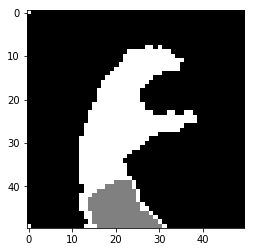

In [6]:
figure()
imshow(codeim)
gray()
show()

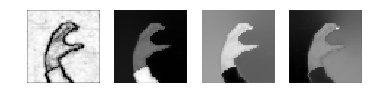

In [7]:
code, V = ncut.cluster(A, k=4, ndim=3)
figure()
for i in range(4):
    subplot(1, 4, i+1)
    imshow(imresize(V[i].reshape(wid, wid), (m, n), interp='bilinear'))
    axis('off')
show()

In [8]:
def normal_cut(im, sd, sg):
    A = ncut.ncut_graph_matrix(rim, sigma_d=sd, sigma_g=sg)
    code, V = ncut.cluster(A, k=3, ndim=3)
    codeim = imresize(code.reshape(wid, wid), (m, n), interp='nearest')

    figure()
    gray()
    subplot(1, 2, 1)
    imshow(rim)
    subplot(1, 2, 2)
    imshow(codeim)
    show()

    code, V = ncut.cluster(A, k=4, ndim=3)
    figure()
    for i in range(4):
        subplot(1, 4, i+1)
        imshow(imresize(V[i].reshape(wid, wid), (m, n), interp='bilinear'))
        axis('off')
    show()

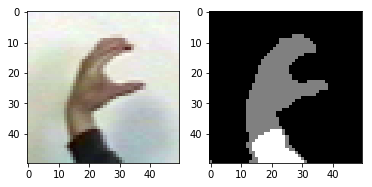

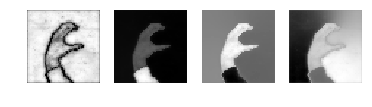

In [10]:
normal_cut(rim, 2, 1e-2)

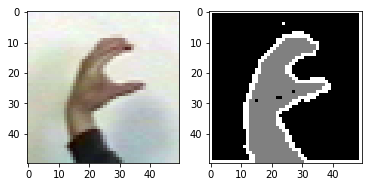

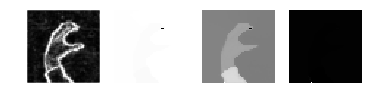

In [11]:
normal_cut(rim, 0.5, 1e-2)

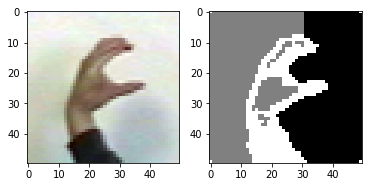

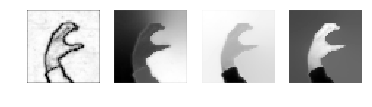

In [12]:
normal_cut(rim, 1, 2e-2)

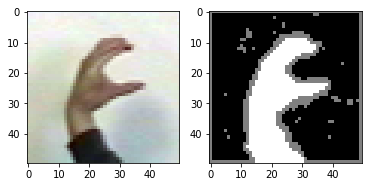

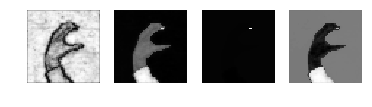

In [13]:
normal_cut(rim, 1, 0.5e-2)

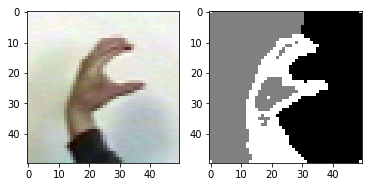

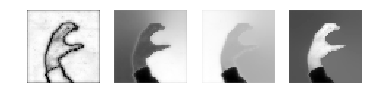

In [14]:
normal_cut(rim, 2, 2e-2)

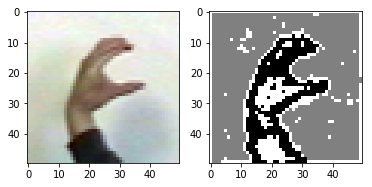

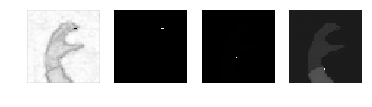

In [15]:
normal_cut(rim, 0.5, 0.5e-2)

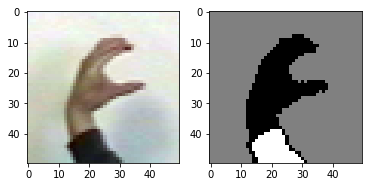

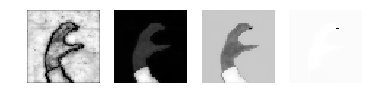

In [16]:
normal_cut(rim, 2, 0.5e-2)

In [17]:
# I like this one